# Classification ML Algorithms

Classification algorithms are explored using the MNIST Dataset

In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y= mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


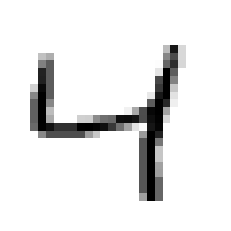

In [ ]:

some_digit = X.iloc[2]
sdi = some_digit.to_numpy().reshape(28,28)
plt.imshow(sdi, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y = y.astype(np.uint8)

In [ ]:
X_train, X_test, y_train, y_test =  X[:60000], X[60000:], y[:60000], y[60000:]

## Binary detector
Only detecting if image is 5 or not

In [ ]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([False])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train_5, cv=3, scoring='accuracy')



array([0.95035, 0.96035, 0.9604 ])

### Confusion Matrix
Because it is a better method than accuracy to measure performance of classificaiton algorithms

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred), recall_score(y_train_5,y_train_pred)

(0.8370879772350012, 0.6511713705958311)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

While SGD does not allow you to adjust threshold it uses for classification, the `decision_function()` returns the score for each data point. This can later be used for adjusting threshold manually.

In [ ]:
y_scores = sgd.decision_function([some_digit])
example_predict = (y_scores > 1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3,
                             method="decision_function")
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

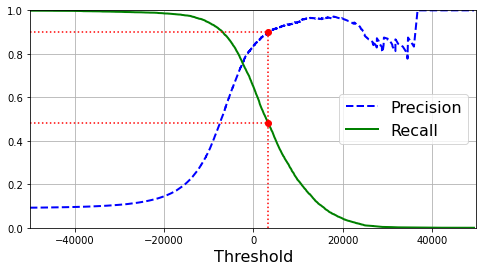

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

## ROC Curve


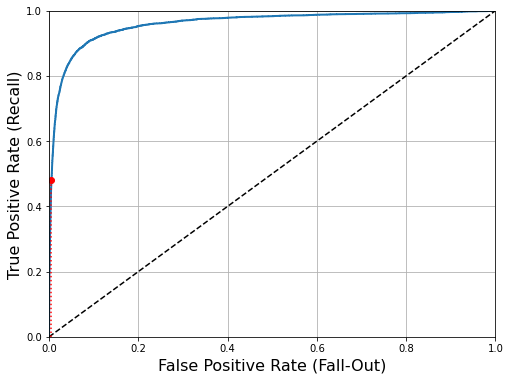

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
y_prob_rfc = cross_val_predict(rfc, X_train, y_train_5, cv=5, method='predict_proba')

In [ ]:
y_scores_rfc = y_prob_rfc[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_train_5,y_scores_rfc)

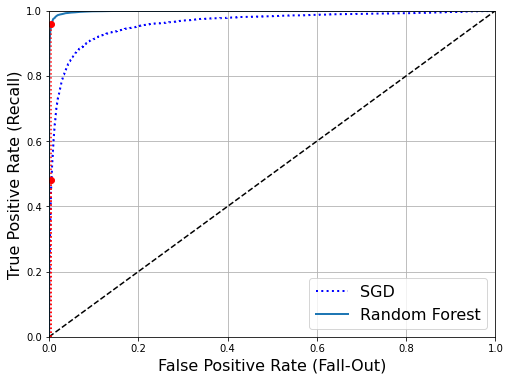

In [ ]:
recall_for_forest = tpr_rfc[np.argmax(fpr_rfc >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_rfc, tpr_rfc, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

# Multiclass Classification

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([4], dtype=uint8)

In [ ]:
some_digit_scores = svm.decision_function([some_digit])
some_digit_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.71537935, -0.29662415,  5.21971626,  6.21824425,  9.30389385,
         3.80284658,  1.79830476,  7.24440738,  2.74262663,  8.25740666]])

In [ ]:
highest_score = np.argmax(some_digit_scores)
svm.classes_[highest_score] # only works in this case. May not map properly for other datasets

4

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
ovr_svm = OneVsRestClassifier(SVC())
rfc = RandomForestClassifier()
ovr_rfc = OneVsRestClassifier(rfc)
ovr_svm.fit(X_train[:1000], y_train[:1000])
ovr_rfc.fit(X_train[:1000], y_train[:1000])
ovr_svm.predict([some_digit]), ovr_rfc.predict([some_digit])



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

(array([4], dtype=uint8), array([4], dtype=uint8))

## Confusion Matrix

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
#cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring="accuracy")
y_train_pred = cross_val_predict(sgd, X_train_scaled[:1000], y_train[:1000], cv=3)
conf_mx = confusion_matrix(y_train[:1000], y_train_pred)
conf_mx

array([[ 88,   0,   0,   0,   0,   7,   2,   0,   0,   0],
       [  1, 100,   3,   0,   0,   4,   0,   1,   5,   2],
       [  2,   3,  73,   3,   2,   3,   3,   4,   5,   1],
       [  0,   1,   7,  74,   1,   5,   0,   2,   0,   3],
       [  1,   0,   1,   2,  85,   4,   2,   1,   2,   7],
       [  0,   2,   2,   9,   4,  65,   1,   1,   6,   2],
       [  2,   2,   3,   0,   2,   4,  81,   0,   0,   0],
       [  0,   0,   2,   1,   4,   0,   0, 104,   0,   6],
       [  0,   4,   2,   0,   0,   6,   2,   1,  70,   2],
       [  5,   0,   0,   1,   5,   1,   0,  17,   1,  70]])

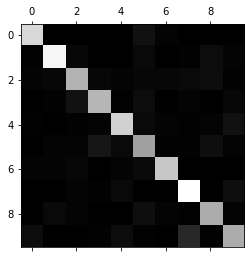

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

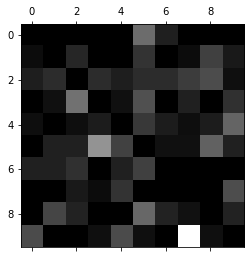

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

# Multi-label Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[False, False]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=2)
f1_score(y_multilabel, y_train_knn_pred, average="macro")
# Runs for a very long time

0.9735086054032637

# Multi-output Classification

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
some_index = 2
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
#save_fig("noisy_digit_example_plot")
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
#save_fig("cleaned_digit_example_plot")